In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'data.csv'  # Replace with the correct path
df = pd.read_csv(file_path)

# Split features and labels
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Normalize the features
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


C:\Users\ranveer\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\ranveer\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\ranveer\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\ranveer\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


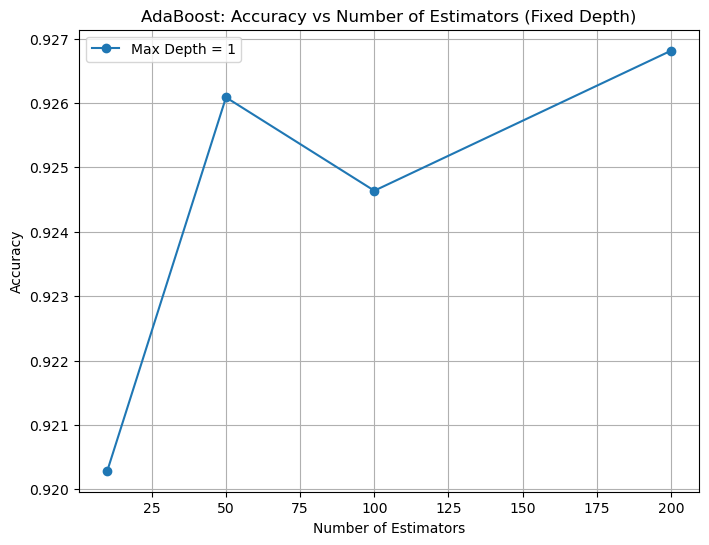

In [7]:
# Experiment 1: Vary n_estimators
n_estimators_list = [10, 50, 100, 200]
fixed_depth = 1 # Keep max_depth constant
results_estimators = []

for n_estimators in n_estimators_list:
    weak_learner = DecisionTreeClassifier(max_depth=fixed_depth, random_state=42)
    ada = AdaBoostClassifier(estimator=weak_learner, n_estimators=n_estimators, random_state=42)  # Updated
    ada.fit(X_train, y_train)
    y_pred = ada.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results_estimators.append({"n_estimators": n_estimators, "accuracy": accuracy})

# Plot results for n_estimators
estimators_df = pd.DataFrame(results_estimators)
plt.figure(figsize=(8, 6))
plt.plot(estimators_df["n_estimators"], estimators_df["accuracy"], marker='o', label=f"Max Depth = {fixed_depth}")
plt.title("AdaBoost: Accuracy vs Number of Estimators (Fixed Depth)")
plt.xlabel("Number of Estimators")
plt.ylabel("Accuracy")
plt.legend()
plt.grid()
plt.show()


C:\Users\ranveer\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\ranveer\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\ranveer\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


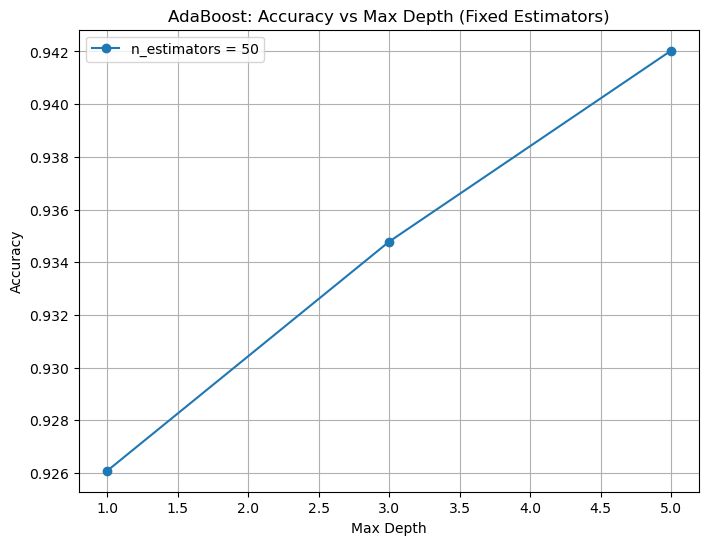

In [11]:
# -----------------------------
# Experiment 2: Vary max_depth
# -----------------------------
max_depth_list = [1, 3, 5]
fixed_estimators = 50  # Keep n_estimators constant
results_depth = []

for max_depth in max_depth_list:
    weak_learner = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    ada = AdaBoostClassifier(estimator=weak_learner, n_estimators=fixed_estimators, random_state=42)
    ada.fit(X_train, y_train)
    y_pred = ada.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results_depth.append({"max_depth": max_depth, "accuracy": accuracy})

# Plot results for max_depth
depth_df = pd.DataFrame(results_depth)
plt.figure(figsize=(8, 6))
plt.plot(depth_df["max_depth"], depth_df["accuracy"], marker='o', label=f"n_estimators = {fixed_estimators}")
plt.title("AdaBoost: Accuracy vs Max Depth (Fixed Estimators)")
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.legend()
plt.grid()
plt.show()